In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for Linear & Logistic regression
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # Feature Scaling is necessary
from sklearn.metrics import f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing the training data as dataframe
trainingdf = pd.read_csv('titanic/train.csv')

# Basic info
print(trainingdf.head())
print('\n\n\n')
print('Describing data \n', trainingdf.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [3]:
#Checking for null values
print(trainingdf.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


I already see there are 891 records for training set, with Age being only 714 records implying missing values.
I also see a similar concern in testing set, with 418 records but Age being only 332 records and Fare missing a record also.
First, I will get a read on missing values. Then, I will impute those missing values. After, I will work on duplicates and outliers.

In [5]:
#Handling null values
trainingdf = trainingdf.dropna(subset=['Embarked'])
trainingdf['Age'] = trainingdf['Age'].fillna(trainingdf['Age'].mean())
trainingdf['Cabin'] = trainingdf['Cabin'].fillna('N/A')

#Verifying that there are no more null
print(trainingdf.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   N/A        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   N/A        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N/A        S  


Age is something that could be handled as well as Embarked, but the Cabin field is missing way too many values. 

### Handling Null Entries
I found that there were null values in 3 different columns, 'Embarked', 'Age', and 'Cabin'. For embarked, since there were only 2 null entries of over 800, I simply dropped those entries. This is because it does not hurt the sample size, and there is no logical way to accurately impute these missing values. However, I could not do the same for age since there were 177 null values in this column. For this column, I decided to go with mean imputation. This was acceptable since the mean and median were roughly equal, which hinted that the mean was accurately representing the population. Finally, for the cabin column, there were 687 null values, which is the majority of values in the column. I could not drop these entries because then I would be losing most of my data. I also could not predict these values since less than half of my data would be used to build a model to predict these values, which would be inaccurate. Ultimately, after observing the data in this column and noticing roughly unique values, I decided to impute 'N/A' in this column for all missing values. This is because the column was not giving us much useful information anyways.

### Handling Outliers
In my data, I noticed there were some outliers in the age, sibsp, parch, and fare columns. Initially I planned on removing some of these entries, however, I ultimately decided to keep them around longer to learn more about why they exist. These outlier values can give key insight on whether certain characteristics increased survival chances or not. Additionally, they do not negatively interfere with the type of analysis we are conducting in this step, nor ruin the nature of our analysis. For example, the maximum age was 80, a lot higher than the mean/median which were both just under 30. However, 80 is a realistc age of someone on a cruise ship. It is not a value like 500, which would be an unrealistic age that simply messes with my data. The same goes with the minimum value for age, which was under 1, but not negative (representing an infant, who is most likely brought along to the trip with their parents). 

In [9]:
#Creating a numerical representation for the sex and embarked columns for easy analysis
trainingdf['Sex_binary'] = trainingdf['Sex'].map({'male': 0, 'female': 1})
trainingdf['Embarked_numeric'] = trainingdf['Embarked'].map({'S': 0, 'C':1, 'Q':2})
print(trainingdf.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binary  \
0      0         A/5 21171   7.2500   N/A        S           0   
1      0          PC 17599  71.2833   C85        C           1   
2      0  STON/O2. 3101282   7.9250   N/A        S           1   
3      0            113803  53.1000  C123        S      

### Handling Non-numerical data
A good way to quickly locate correlations between certain characteristics is to conduct Pearsons correlation analysis. In this analysis, I would ideally like to include all of the important columns of data, but the correlation analysis is limited to numerical data. Therefore, I must first convert non-numerical data to numbers. For the sex column, this was easy. I simply added a column that represented this data in a binary way using 0 for male and 1 for female (I could have easily done the opposite without loss of generality). For the Embarked column, this required a little more care, since there were 3 different possible values for this. Usually, it is not recommended to represent more than 2 non-numerical values using numbers, but this data happened to be ordinal. Thus, I was able to create a column labeled Embarked_numeric in which I used the numbers 0-2 to represent the three different ports (Southhampton, Cherbourg, and Queenstown) in the order in which they came. This could potentially reveal if those who embarked earlier were at an advantage/disadvantage. 

#### Leaving out data
Data such as the passenger's name, ticket number, and cabin were some of the non-numerical data that was deemed not important enough to be converted to a numerical form and included in the analysis. This is because they were all unique/mostly unique values were not likely to impact survival chances. Converting these values to numerical representations was not going to provide meaningful information for our context either. For example, if everyone named "John" survived, it would likely be due to chance rather than something intrinsic about the name itself.

Another column left out of analysis was PassengerID, since it is also just a unique arbitrary identifier, and nothing of intrinsic value

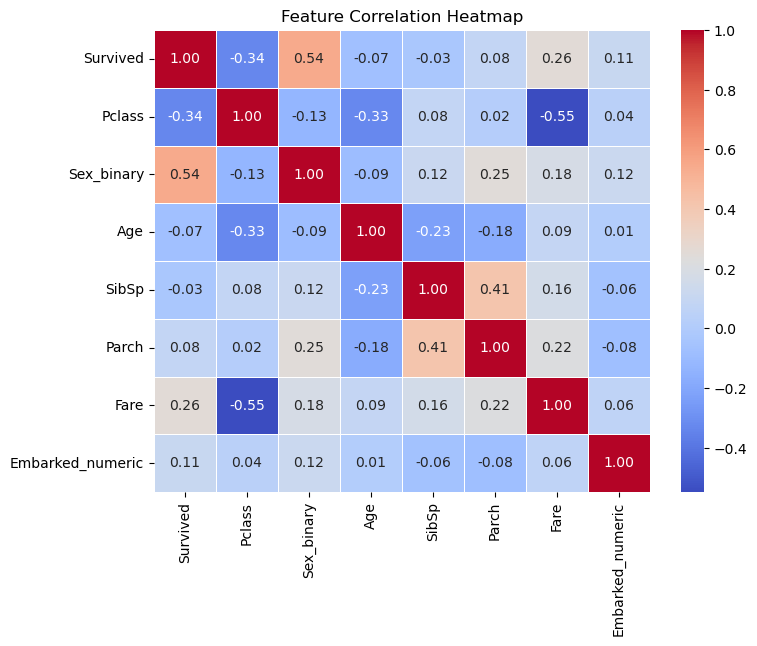

In [11]:
#Setting up a pearson correlation heatmap to visualize potential relations between variables
pearson = trainingdf[['Survived', 'Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]

pearson_matrix = pearson.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap") 
plt.show()

### Pearson Correlation Analysis Results
The correlation analysis pointed out some interesting relations that existed between certain factors. Here are some of the significant correlations in order of strength:
- Fare and pclass (-0.55): this is obvious since more luxurious classes are bound to be more expensive
- Sex and Survived (0.54): this was an interesting relation revealing that there was a somewhat strong positive correlation to being female and surviving. A lot can be asked as per why this was the case. Were women given priority when trying to get passengers to safety, or did they have some superior survival instincts?
- Survived and pclass (-0.34): Better class tickets were associated with better chances of survival. This reveals an interesting trend, and may suggest a possible method to increase your chances of surviving a similar catastrophe, that being buy a first class ticket. A similar trend is mirrored with suvival and fare, going hand-in-hand with this correlation.
- Age and pclass (-0.33): This revealed a socioeconomic trend, implying that there is a moderate negative correlation with age and the class of their ticket. This means that older people were more likely to buy first class tickets than younger people. Factors such as gender however did not play a role here. 
- Sex and Parch (0.25): This implies that women are more likely to have parents/children on board. Can this be related back to the higher survival odds for women, implying traveling with family is safer?
- Age and Parch (-0.18): This reveals older passengers had fewer parents/children on board. This makes sense because as you get older, you are more capable to go on trips with fewer people. Children on the other hand are very likely to be accompanied by a parent.
- Sex and fare (0.18): This is another very interesting finding, revealing that women are more liekly to pay slightly more for their tickets than men. It was found earlier that they have higher survival odds, and that a better class ticket also has higher survival odds. This may explain it, suggesting that women survived more due to purchasing the better tickets.

### Modeling

In [14]:
# Only use the numerical values
sample_df = trainingdf[['Survived', 'Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]

# Randomly choose 80% for training and other 20% for testing

# Sample 712 random rows (80%) with popular seed value 42
train_df = sample_df.sample(n=712, random_state=42)

# The remaining rows go into the second subset
test_df = sample_df.drop(train_df.index)



### Model 1 - Logistic Regression (All Numeric Features)

In [16]:
x_train = train_df[['Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
y_train = train_df[['Survived']]

x_test = test_df[['Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
y_test = test_df[['Survived']]

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)
logistic_predictions = logistic_model.predict(x_test)

logistic_f1_score = f1_score(y_test, logistic_predictions)
print(f"Logistic Regression F1_score: {logistic_f1_score}")

Logistic Regression F1_score: 0.6446280991735537


### Model 2 - Nearest Neighbour
1. Utilized Feature Scaling which is required For K Nearest Neighbor Model
2. Performed KNN with testing for best performing hyperparameter (k=1 to k=10)
3. k was tested only up to the value 10 because of the rationale that individuals influence from others can vary (lone traveler) to with family and business friends. Any higher value of k could be dangerous in that "noise" could be overfit which should not be fit as 10 approximately makes 1% of the entire dataset in test.csv 

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# Initialize KNN (start with k=5 as a default)
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(x_train_scaled, y_train)

# Predict
knn_predictions = knn.predict(x_test_scaled)

# Evaluate
knn_f1 = f1_score(y_test, knn_predictions)
print(f"KNN F1 Score: {knn_f1}")

KNN F1 Score: 0.7226890756302521


In [20]:
# Experiment with Hyperparameter tuning for k
for i in range(1,10):
    # Initialize KNN (start with k=i as a default)
    knn = KNeighborsClassifier(n_neighbors=i)

    # Train
    knn.fit(x_train_scaled, y_train)

    # Predict
    knn_predictions = knn.predict(x_test_scaled)

    # Evaluate
    knn_f1 = f1_score(y_test, knn_predictions)
    print(f"KNN F1 Score k={i}: {knn_f1}")

KNN F1 Score k=1: 0.6666666666666666
KNN F1 Score k=2: 0.6857142857142857
KNN F1 Score k=3: 0.7226890756302521
KNN F1 Score k=4: 0.6923076923076923
KNN F1 Score k=5: 0.6956521739130435
KNN F1 Score k=6: 0.6972477064220184
KNN F1 Score k=7: 0.6837606837606838
KNN F1 Score k=8: 0.7027027027027027
KNN F1 Score k=9: 0.6842105263157895


Best performer k=3, followed by k=8 at 0.723 and 0.703 respectively. Others, are below 0.7

### Model 3 - Logistic Regression (Selected Numeric Features)

In [23]:
# x_train = train_df[['Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
x_train = train_df[['Pclass', 'Sex_binary', 'Parch', 'SibSp']]
y_train = train_df[['Survived']]

# x_test = test_df[['Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
x_test = test_df[['Pclass', 'Sex_binary', 'Parch', 'SibSp']]
y_test = test_df[['Survived']]

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)
logistic_predictions = logistic_model.predict(x_test)

logistic_f1_score = f1_score(y_test, logistic_predictions)
print(f"Logistic Regression F1_score: {logistic_f1_score}")

# Generic: 0.7
# Without Pclass: 0.6495726495726496
# Without Age: 0.6610169491525425
# Without Sex_binary: 0.4999999999999999 !!!!
# Without SibSp: 0.65
# Without Parch: 0.65
# Without Fare: 0.65
# Without Embarked_numeric: 0.639344262295082
# Without Age & Embarked_numeric: 0.6724137931034484
# Without Age, Embarked_numeric, Fare: 0.6842105263157895
# Without Pclass, Age, Fare, Embarked_numeric: 0.6724137931034484

Logistic Regression F1_score: 0.6842105263157895


Best Candidate uses features: Pclass, Sex_binary, Parch, and SibSp 
Best F1_score is 0.6842

Dropping any further feature does not make sense because then we are relying on way too little features which could result in a form of "bias". 


### Applying the best model - KNN

In [26]:
# Inspecting test.csv first for data cleanliness
testingdf = pd.read_csv('titanic/test.csv')

print(testingdf.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [27]:
# Performing imputations and modifications for applying the model
testingdf['Age'] = testingdf['Age'].fillna(testingdf['Age'].mean())
testingdf['Fare'] = testingdf['Fare'].fillna(testingdf['Fare'].mean())
testingdf['Cabin'] = testingdf['Cabin'].fillna('N/A')
testingdf['Sex_binary'] = testingdf['Sex'].map({'male': 0, 'female': 1})
testingdf['Embarked_numeric'] = testingdf['Embarked'].map({'S': 0, 'C':1, 'Q':2})

In [28]:
sample_df = trainingdf[['Survived', 'Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
x_train = sample_df[['Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
y_train = sample_df[['Survived']]

x_test = testingdf[['Pclass', 'Sex_binary', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# k=3 was the best performer
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(x_train_scaled, y_train)

# Predict
prediction = knn.predict(x_test_scaled)

### Answer:
The logistic regression provided some insight on how to survive a catastrophe similar to this. Through the rapid decrease of the f1 score when the "sex" column was varied, it was hinted that being a female correlated with slightly higher odds of survival.

The best Classifier is KNN with hyperparameter k set to 3

In [30]:
# Generating CSV Dump - cse351_project_prediction.csv
knn_df = pd.DataFrame({
    'date': testingdf['PassengerId'],
    'survived': prediction
})

knn_df.to_csv('cse351_project_prediction.csv')